In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflowjs as tfjs
import matplotlib.pyplot as plt

In [3]:
# Read the Excel file into a DataFrame
df = pd.read_excel('../data/Dataset_Number2&3a.xlsx')

# Display the first few rows of the DataFrame
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,Group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93.0,91
1,male,Group C,some college,standard,none,married,sometimes,yes,0,school_bus,5-10,76,78.0,75
2,female,Group B,some college,standard,completed,widowed,never,no,1,private,5-10,85,93.0,89
3,male,Group B,some college,free/reduced,none,married,sometimes,yes,1,private,> 10,41,43.0,39
4,male,Group D,high school,free/reduced,completed,single,sometimes,no,3,private,> 10,65,64.0,68


In [4]:

# Select features (X) and target variable (y)
X = df[["MathScore", "ReadingScore", "WritingScore"]]
y = df['WklyStudyHours']

In [5]:
# Encode the target variable into numerical values
le = LabelEncoder()
y = le.fit_transform(y)  # Convert categories ('< 5', '5-10', '> 10') to numeric labels

In [6]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Build the Neural Network Model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer
])

In [9]:
# Compile the model with learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add EarlyStopping to monitor the validation loss
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5460 - loss: 1.0105 - val_accuracy: 0.5360 - val_loss: 0.9940
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5482 - loss: 0.9919 - val_accuracy: 0.5360 - val_loss: 0.9917
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5497 - loss: 0.9849 - val_accuracy: 0.5360 - val_loss: 0.9934
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5524 - loss: 0.9848 - val_accuracy: 0.5360 - val_loss: 0.9899
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5501 - loss: 0.9860 - val_accuracy: 0.5360 - val_loss: 0.9899
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5479 - loss: 0.9891 - val_accuracy: 0.5360 - val_loss: 0.9908
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5514 - loss: 0.9831 - val_accuracy: 0.5360 - val_loss: 0.9929
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5449 - loss: 0.9903 - val_accuracy: 0.

In [10]:
# Evaluate the model on test set
y_pred = np.argmax(model.predict(X_test), axis=-1)  # Convert softmax output to class labels

# Calculate Accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy on Test Set: {accuracy:.4f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy on Test Set: 0.5360


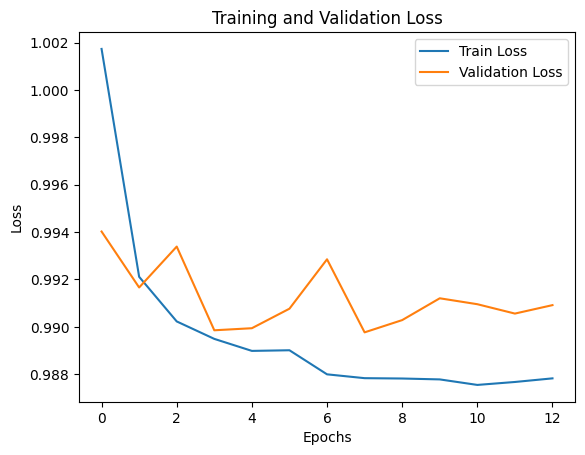

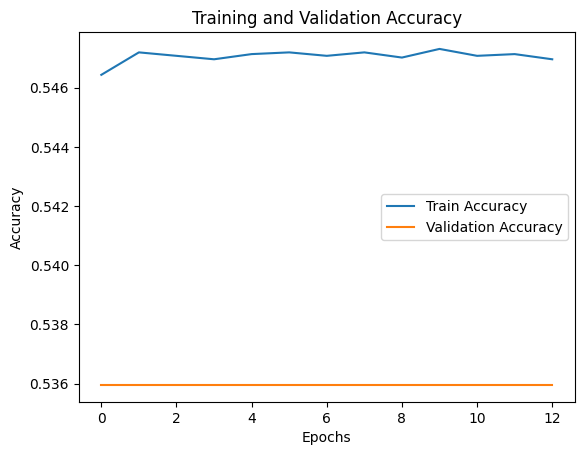

In [11]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [14]:
import keras

# 1. Save as .h5
keras.saving.save_model(model, 'model/3b/model.h5')

# 2. Save as .keras
keras.saving.save_model(model, 'model/3b/model.keras')

# 3. Save as SavedModel
tf.saved_model.save(model, 'model/3b/saved_model/')

# 4. Save model in TensorFlow.js format
tfjs.converters.save_keras_model(model, 'model/3b/tfjs_model')

# 5. Save as .tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model/3b/model.tflite', 'wb') as f:
    f.write(tflite_model)

failed to lookup keras version from the file,
    this is likely a weight only file
Saved artifact at '/tmp/tmp62lxeco8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  137994330288224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137994315783984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137994315785568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137994315782400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137994315782576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137994315786272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137994315786800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137994315788208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137994315787328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13799431